In [2]:
!pip install kaggle


In [3]:
from google.colab import files
files.upload()  # Upload the kaggle.json file here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mshishirareddy","key":"d67f90d9f412d4427dfafd0f5dd0a024"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d mloey1/ahdd1 -p /content --unzip


Dataset URL: https://www.kaggle.com/datasets/mloey1/ahdd1
License(s): DbCL-1.0


In [8]:
import os
print(os.listdir("/content"))


['.config', 'Train + Test Matlab.mat', 'csvTrainLabel 60k x 1.csv', 'csvTrainImages 60k x 784.csv', 'csvTestLabel 10k x 1.csv', 'csvTrainImages 60k x 784', 'csvTestImages 10k x 784.csv', 'Arabic Handwritten Digits Dataset CSV', 'sample_data']


In [9]:
dataset_path = "/content/AHDD"  # Adjust folder name based on extracted files


In [10]:
!pip install tensorflow pandas numpy matplotlib


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


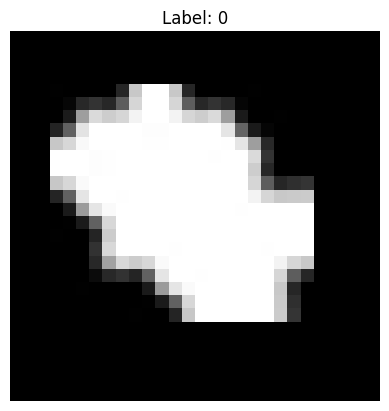

In [12]:
# Load dataset from downloaded CSV files
train_images = pd.read_csv('/content/csvTrainImages 60k x 784.csv', header=None).values
train_labels = pd.read_csv('/content/csvTrainLabel 60k x 1.csv', header=None).values.flatten()

test_images = pd.read_csv('/content/csvTestImages 10k x 784.csv', header=None).values
test_labels = pd.read_csv('/content/csvTestLabel 10k x 1.csv', header=None).values.flatten()

# Reshape images from (n_samples, 784) → (n_samples, 28, 28, 1)
train_images = train_images.reshape(-1, 28, 28, 1) / 255.0  # Normalize
test_images = test_images.reshape(-1, 28, 28, 1) / 255.0  # Normalize

# One-hot encode labels
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Display a sample image
plt.imshow(train_images[0].squeeze(), cmap='gray')
plt.title(f"Label: {np.argmax(train_labels[0])}")
plt.axis('off')
plt.show()


In [13]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes (0-9 Arabic numerals)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 32ms/step - accuracy: 0.9122 - loss: 0.2943 - val_accuracy: 0.9887 - val_loss: 0.0371
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9879 - loss: 0.0438 - val_accuracy: 0.9920 - val_loss: 0.0260
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9902 - loss: 0.0332 - val_accuracy: 0.9932 - val_loss: 0.0218
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 88s 36ms/step - accuracy: 0.9924 - loss: 0.0288 - val_accuracy: 0.9923 - val_loss: 0.0265
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.9939 - loss: 0.0223 - val_accuracy: 0.9938 - val_loss: 0.0218
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9940 - loss: 0.0195 - val_accuracy: 0.9934 - val_loss: 0.0235
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9956 - loss: 0.0175 - val_accuracy: 0.9942 - val_loss: 0.0191
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9960 -

In [22]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9906 - loss: 0.0464
Test Accuracy: 98.94%


Saving something.jpg to something.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


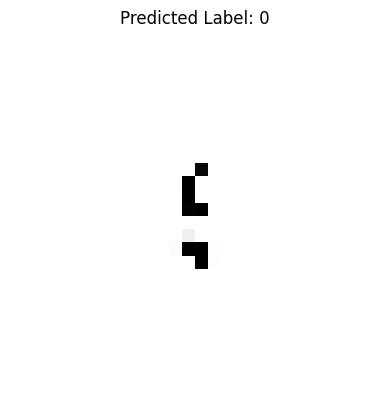

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files

def upload_and_predict():
    uploaded = files.upload()
    for file_name in uploaded.keys():
        img = load_img(file_name, color_mode='grayscale', target_size=(28, 28))
        img_array = img_to_array(img) / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)

        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction)

        plt.imshow(img_array.squeeze(), cmap='gray')
        plt.title(f"Predicted Label: {predicted_label}")
        plt.axis('off')
        plt.show()

# Run the function to test image prediction
upload_and_predict()
